In [3]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
!kaggle datasets download -d fmendes/fmendesdat263xdemos

  0% 0.00/296k [00:00<?, ?B/s]
100% 296k/296k [00:00<00:00, 106MB/s]


In [7]:
! mkdir train


In [8]:
! unzip fmendesdat263xdemos.zip -d train


Archive:  fmendesdat263xdemos.zip
  inflating: train/calories.csv      
  inflating: train/exercise.csv      


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [10]:
exercises_df = pd.read_csv('/content/train/exercise.csv')
calories_df = pd.read_csv('/content/train/calories.csv')

In [11]:
exercises_df.info()
calories_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [13]:
# Summary statistics
exercises_df.describe()


User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  
mean      95.518533     40.025453  
std        9.583328      0.779230  
min       67.000000     37.100000  
25%       88.000000     39.600000  
50%       96.000000     40.200000  
75%      103.000000     40.600000  
max      128.000000     41.500000

In [14]:
# Summary statistics
calories_df.describe()

User_ID      Calories
count  1.500000e+04  15000.000000
mean   1.497736e+07     89.539533
std    2.872851e+06     62.456978
min    1.000116e+07      1.000000
25%    1.247419e+07     35.000000
50%    1.499728e+07     79.000000
75%    1.744928e+07    138.000000
max    1.999965e+07    314.000000

In [15]:
# Check for missing values
exercises_df.isnull().sum()
calories_df.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [17]:
merged_df = pd.merge(exercises_df, calories_df, on='User_ID')


In [33]:
merged_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

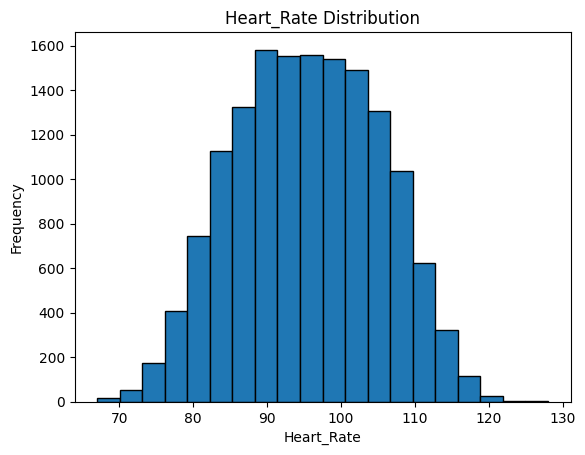

In [32]:
plt.hist(merged_df['Heart_Rate'], bins=20, edgecolor='k')
plt.xlabel('Heart_Rate')
plt.ylabel('Frequency')
plt.title('Heart_Rate Distribution')
plt.show()

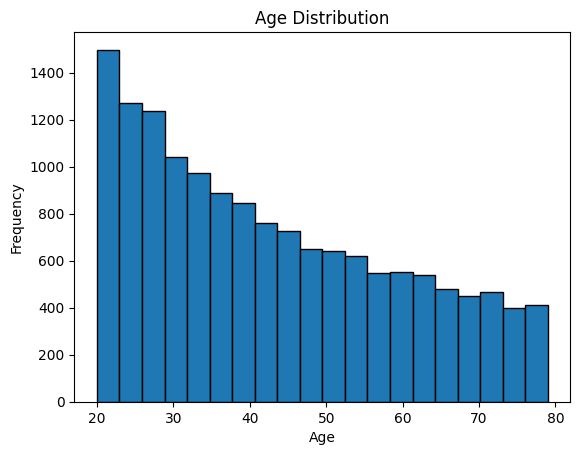

In [19]:
plt.hist(merged_df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


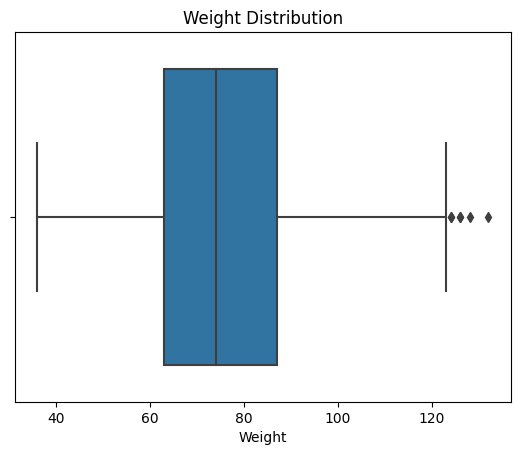

In [20]:
# Boxplot for Weight
sns.boxplot(x='Weight', data=merged_df)
plt.xlabel('Weight')
plt.title('Weight Distribution')
plt.show()

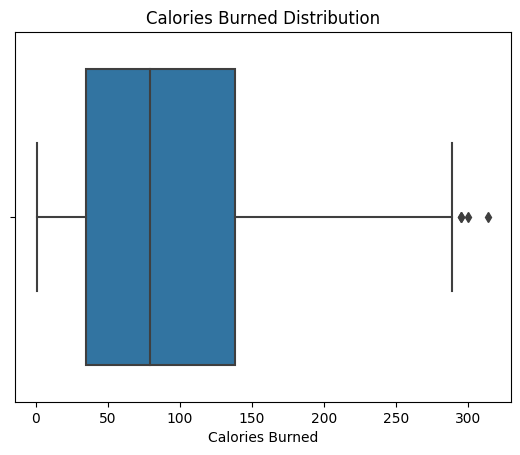

In [21]:
# Boxplot for Calories
sns.boxplot(x='Calories', data=merged_df)
plt.xlabel('Calories Burned')
plt.title('Calories Burned Distribution')
plt.show()

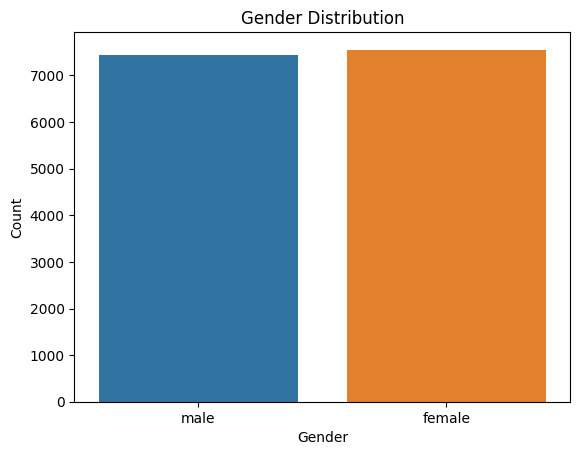

In [22]:
sns.countplot(x='Gender', data=merged_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

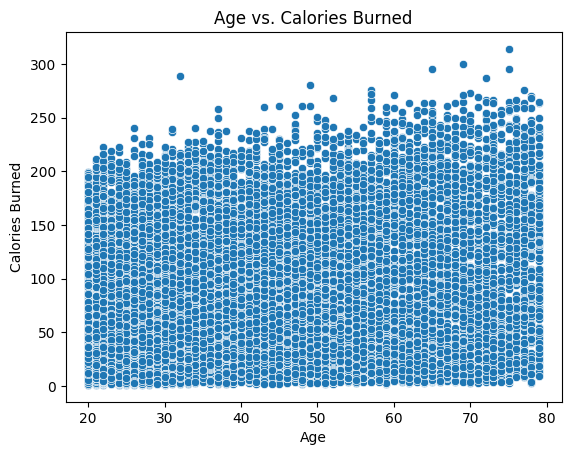

In [26]:
#Scatterplot to visualize the relationship between age and calories burned:
sns.scatterplot(x='Age', y='Calories', data=merged_df)
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.title('Age vs. Calories Burned')
plt.show()

<ipython-input-29-6cb57597bde5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


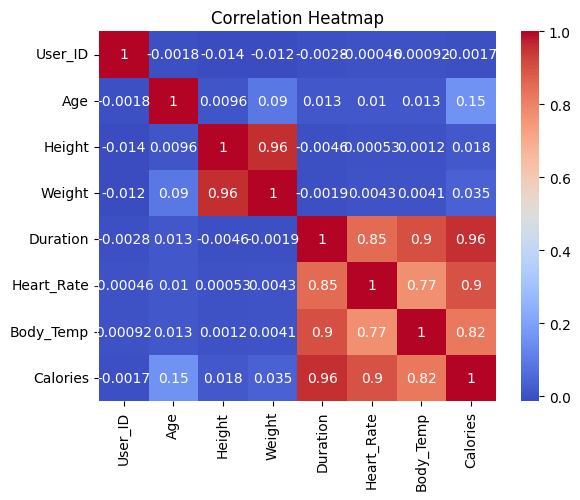

In [29]:
#Calculate and visualize correlations between numerical variables.
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
merged_df['BMI'] = merged_df['Weight'] / ((merged_df['Weight'] / 100) ** 2)



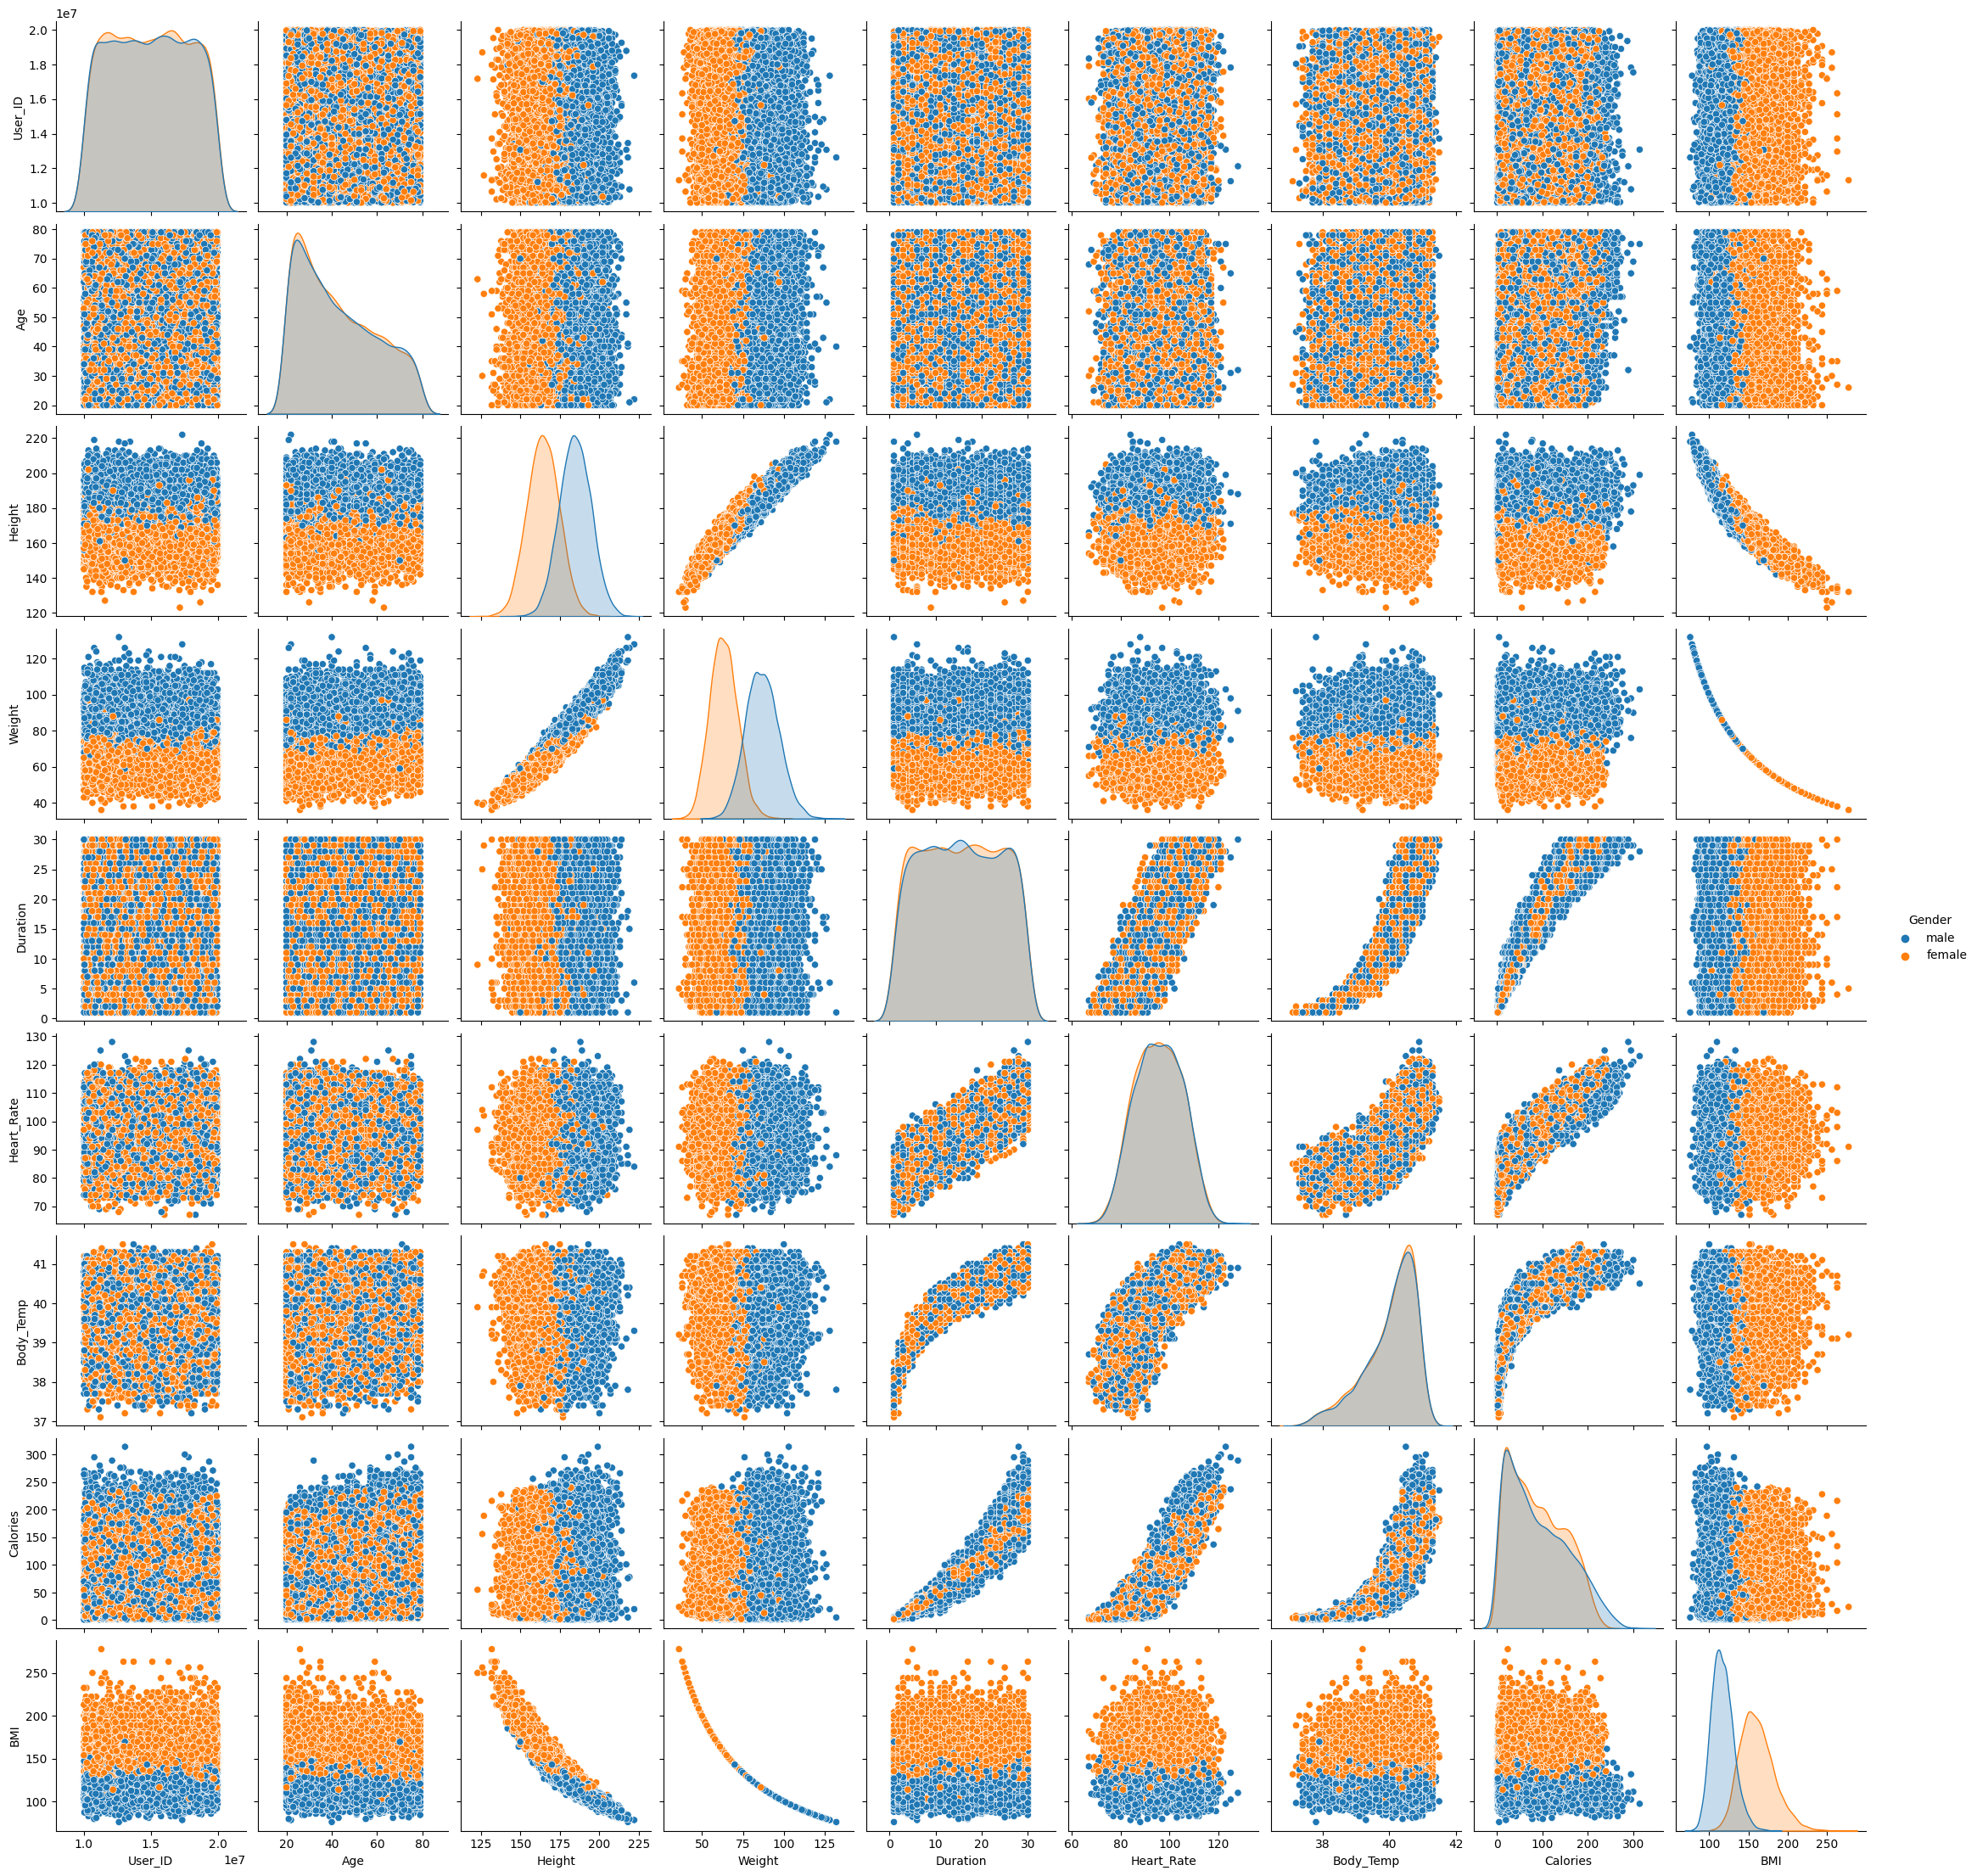

In [37]:
sns.pairplot(merged_df, hue='Gender')
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
X = merged_df[['Age','Duration', 'Heart_Rate','Body_Temp', 'BMI']]
y = merged_df['Calories']


Mean Squared Error: 1.9890491606195768


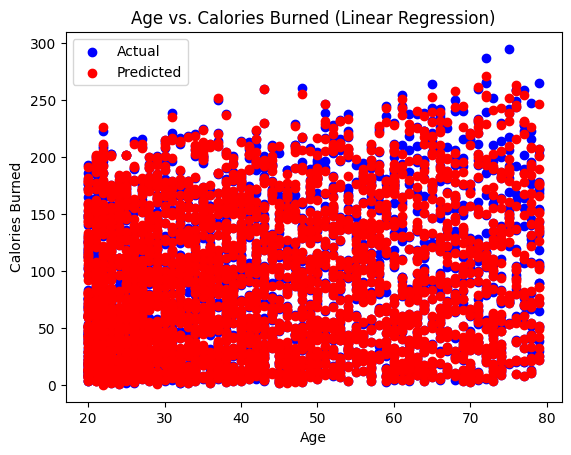

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.02, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualization of the regression line
plt.scatter(X_test['Age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.title('Age vs. Calories Burned (Linear Regression)')
plt.legend()
plt.show()

In [120]:
sample = np.array([[18,78, 94,40, 21]])
model.predict(sample)

1/1 [==============================] - 0s 230ms/step


array([[1926.3154]], dtype=float32)